<a href="https://colab.research.google.com/github/FeZerD/Ineubytes/blob/main/IneuBytes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk

# Download necessary resources
nltk.download('punkt')

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/ineubytes/df_m.csv')
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,anottator1,anottator2,anottator3,majority
0,@Cloudflare reports #ransom #DDoS attacks have...,Not_News,Not_News,Not_News,Not_News
1,Here’s the one thing you mustn’t tell hackers ...,Not_News,Not_News,Not_News,Not_News
2,@TactiKoolSec There was the time where a not-s...,Not_News,Not_News,Not_News,Not_News
3,Ransomware is a fast-growing threat impacting ...,Not_News,Not_News,Not_News,Not_News
4,Five key cloud and innovation takeaways from I...,Not_News,Not_News,Not_News,Not_News


Removal of unnecessary rows


In [ ]:
# removing every row excluding the row text

df = df[['text']]
df.head()

,text
0,@Cloudflare reports #ransom #DDoS attacks have...
1,Here’s the one thing you mustn’t tell hackers ...
2,@TactiKoolSec There was the time where a not-s...
3,Ransomware is a fast-growing threat impacting ...
4,Five key cloud and innovation takeaways from I...


### ***Tokenization of the data set ***


In [ ]:
# write a code for tokenization of the dataset

# Function to tokenize text
def tokenize_text(text):
  return word_tokenize(text)

# Apply tokenization to the 'text' column
df['tokenized_text'] = df['text'].apply(tokenize_text)

# Display the DataFrame with tokenized text
print(df.head())


                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [@, Cloudflare, reports, #, ransom, #, DDoS, a...  
1  [Here, ’, s, the, one, thing, you, mustn, ’, t...  
2  [@, TactiKoolSec, There, was, the, time, where...  
3  [Ransomware, is, a, fast-growing, threat, impa...  
4  [Five, key, cloud, and, innovation, takeaways,...  


Tokenization visualization


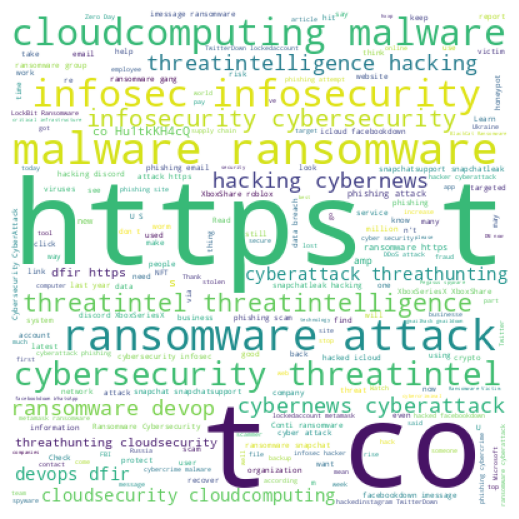

In [ ]:
# creating a word cloud to visualise the dataset

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokenized words into a single string
all_words = ' '.join([' '.join(tokens) for tokens in df['tokenized_text']])

# Generate the word cloud
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(all_words)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Converting the data in lower case


In [ ]:
# convert the tokenized words in lowercase

# Function to convert tokens to lowercase
def lowercase_tokens(tokens):
  return [token.lower() for token in tokens]

# Apply lowercase conversion to the 'tokenized_text' column
df['tokenized_text'] = df['tokenized_text'].apply(lowercase_tokens)

# Display the DataFrame with lowercase tokenized text
print(df.head())


                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [@, cloudflare, reports, #, ransom, #, ddos, a...  
1  [here, ’, s, the, one, thing, you, mustn, ’, t...  
2  [@, tactikoolsec, there, was, the, time, where...  
3  [ransomware, is, a, fast-growing, threat, impa...  
4  [five, key, cloud, and, innovation, takeaways,...  


Word Cloud Of Lower Case Data


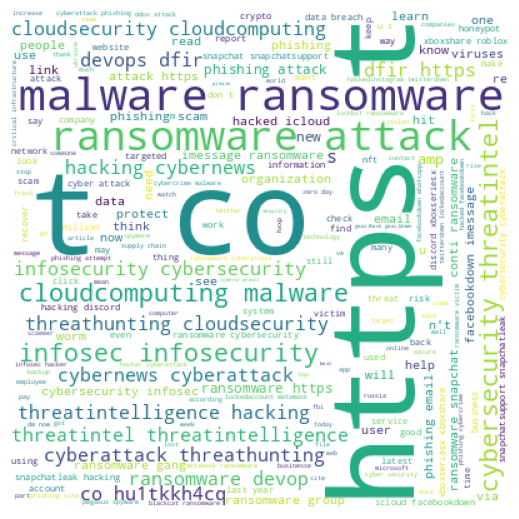

In [ ]:
# wordcloud of the lowercase data

import matplotlib.pyplot as plt
# Combine all tokenized words into a single string
all_words = ' '.join([' '.join(tokens) for tokens in df['tokenized_text']])

# Generate the word cloud
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(all_words)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Stop words removal


In [ ]:
# code for stop words removal of the tokenized data

import matplotlib.pyplot as plt
# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a list of tokens
def remove_stopwords(tokens):
  return [token for token in tokens if token not in stop_words]

# Apply stop word removal to the 'tokenized_text' column
df['tokenized_text'] = df['tokenized_text'].apply(remove_stopwords)

# Display the DataFrame with stop words removed
print(df.head())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [@, cloudflare, reports, #, ransom, #, ddos, a...  
1  [’, one, thing, ’, tell, hackers, business, su...  
2  [@, tactikoolsec, time, not-so-great-at-their-...  
3  [ransomware, fast-growing, threat, impacting, ...  
4  [five, key, cloud, innovation, takeaways, ing,...  


Special character removal


In [ ]:
# remoing the special characters from the dataset

import re

# Function to remove special characters from a list of tokens
def remove_special_characters(tokens):
  return [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]

# Apply special character removal to the 'tokenized_text' column
df['tokenized_text'] = df['tokenized_text'].apply(remove_special_characters)

# Display the DataFrame with special characters removed
print(df.head())


                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [, cloudflare, reports, , ransom, , ddos, atta...  
1  [, one, thing, , tell, hackers, business, succ...  
2  [, tactikoolsec, time, notsogreatattheirjob, s...  
3  [ransomware, fastgrowing, threat, impacting, o...  
4  [five, key, cloud, innovation, takeaways, ing,...  


Punctuations Removal


In [ ]:
# removing puncpuations

import string

# Function to remove punctuation from a list of tokens
def remove_punctuation(tokens):
  return [token for token in tokens if token not in string.punctuation]

# Apply punctuation removal to the 'tokenized_text' column
df['tokenized_text'] = df['tokenized_text'].apply(remove_punctuation)

# Display the DataFrame with punctuation removed
print(df.head())


                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [cloudflare, reports, ransom, ddos, attacks, d...  
1  [one, thing, tell, hackers, business, successf...  
2  [tactikoolsec, time, notsogreatattheirjob, ser...  
3  [ransomware, fastgrowing, threat, impacting, o...  
4  [five, key, cloud, innovation, takeaways, ing,...  


Removal of https


In [ ]:
# removing the https from the dataset

def remove_https(tokens):
  return [token for token in tokens if not token.startswith('https')]

# Apply https removal to the 'tokenized_text' column
df['tokenized_text'] = df['tokenized_text'].apply(remove_https)

# Display the DataFrame with https removed
print(df.head())


                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [cloudflare, reports, ransom, ddos, attacks, d...  
1  [one, thing, tell, hackers, business, successf...  
2  [tactikoolsec, time, notsogreatattheirjob, ser...  
3  [ransomware, fastgrowing, threat, impacting, o...  
4  [five, key, cloud, innovation, takeaways, ing,...  


Word cloud After All That CLeaning


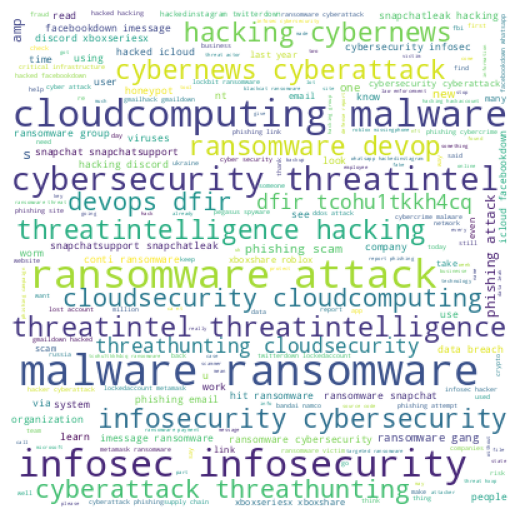

In [ ]:

# Combine all tokenized words into a single string
all_words = ' '.join([' '.join(tokens) for tokens in df['tokenized_text']])

# Generate the word cloud
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(all_words)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Lemitization


In [ ]:
#  lemitization of the dataset

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(token) for token in tokens]

df['tokenized_text'] = df['tokenized_text'].apply(lemmatize_tokens)

print(df.head())


[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [cloudflare, report, ransom, ddos, attack, dro...  
1  [one, thing, tell, hacker, business, successfu...  
2  [tactikoolsec, time, notsogreatattheirjob, ser...  
3  [ransomware, fastgrowing, threat, impacting, o...  
4  [five, key, cloud, innovation, takeaway, ing, ...  


Data in Tabular Form


In [ ]:
#  lematized words in tabular form

import pandas as pd
# Create a new DataFrame with the lemmatized words
lemmatized_df = pd.DataFrame({'Lemmatized Words': [' '.join(tokens) for tokens in df['tokenized_text']]})

# Display the DataFrame in tabular form
print(lemmatized_df)


                                        Lemmatized Words
0      cloudflare report ransom ddos attack dropped d...
1      one thing tell hacker business successfully hi...
2      tactikoolsec time notsogreatattheirjob server ...
3      ransomware fastgrowing threat impacting organi...
4      five key cloud innovation takeaway ing amp goo...
...                                                  ...
36075  uk national cyber security centre warning time...
36076  free crypto coin tip lg mitsubishi hit ransomw...
36077  conti ransomware deployed icedid banking troja...
36078  rt middleeastmnt poland admits using israel pe...
36079  conti claim hacked barwick bathroom distributi...

[36080 rows x 1 columns]


Lemitization Word Cloud


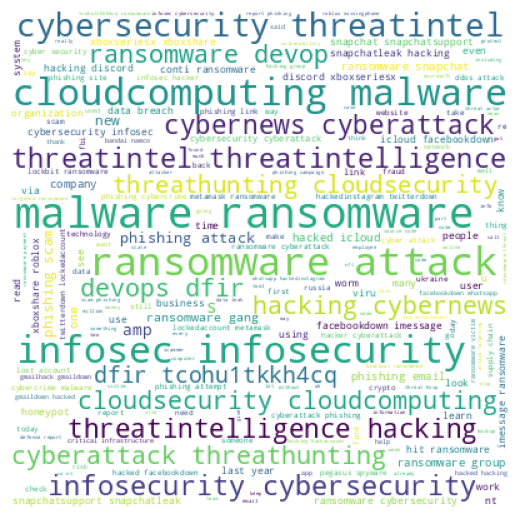

In [ ]:
#  word cloud after lemitization process

import matplotlib.pyplot as plt
# Combine all lemmatized words into a single string
all_lemmatized_words = ' '.join(lemmatized_df['Lemmatized Words'])

# Generate the word cloud
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(all_lemmatized_words)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Vectorization Using TFIDF


In [ ]:
# prompt: perform vectorization using tfidf

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the lemmatized words to create a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(lemmatized_df['Lemmatized Words'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Print some of the feature names
print("Some Feature Names:", feature_names[:20])

# You can access the TF-IDF scores for each document and word using tfidf_matrix.toarray()
# For example, to get the TF-IDF scores for the first document:
# document_tfidf_scores = tfidf_matrix[0].toarray()[0]


TF-IDF Matrix Shape: (36080, 66576)
Some Feature Names: ['000' '0000' '0000297' '000069043' '000198' '000visit' '000webhostapp'
 '001' '001032' '002'
 '00f0538dfeede15f82f03f2e48b1ac96a9ae3f148e64561d03407f8e0e6270d2' '00s'
 '01' '010' '0100' '011' '0114' '0131' '0138pm' '0199620657']


Outputs


In [ ]:
# prompt: show outputs

print(df.head())
print(lemmatized_df)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Some Feature Names:", feature_names[:20])


                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [cloudflare, report, ransom, ddos, attack, dro...  
1  [one, thing, tell, hacker, business, successfu...  
2  [tactikoolsec, time, notsogreatattheirjob, ser...  
3  [ransomware, fastgrowing, threat, impacting, o...  
4  [five, key, cloud, innovation, takeaway, ing, ...  
                                        Lemmatized Words
0      cloudflare report ransom ddos attack dropped d...
1      one thing tell hacker business successfully hi...
2      tactikoolsec time notsogreatattheirjob server ...
3      ransomware fastgrowing threat impacting organi...
4      five key cloud innovation takeaway ing am

Vectorization using Bag of Words


In [ ]:
#  vertorization using bag of words

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the lemmatized words to create a Bag-of-Words matrix
bow_matrix = vectorizer.fit_transform(lemmatized_df['Lemmatized Words'])

# Print the shape of the Bag-of-Words matrix
print("Bag-of-Words Matrix Shape:", bow_matrix.shape)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Print some of the feature names
print("Some Feature Names:", feature_names[:20])

# You can access the word counts for each document and word using bow_matrix.toarray()
# For example, to get the word counts for the first document:
# document_bow_counts = bow_matrix[0].toarray()[0]

print(df.head())
print(lemmatized_df)
print("Bag-of-Words Matrix Shape:", bow_matrix.shape)
print("Some Feature Names:", feature_names[:20])


Bag-of-Words Matrix Shape: (36080, 66576)
Some Feature Names: ['000' '0000' '0000297' '000069043' '000198' '000visit' '000webhostapp'
 '001' '001032' '002'
 '00f0538dfeede15f82f03f2e48b1ac96a9ae3f148e64561d03407f8e0e6270d2' '00s'
 '01' '010' '0100' '011' '0114' '0131' '0138pm' '0199620657']
                                                text  \
0  @Cloudflare reports #ransom #DDoS attacks have...   
1  Here’s the one thing you mustn’t tell hackers ...   
2  @TactiKoolSec There was the time where a not-s...   
3  Ransomware is a fast-growing threat impacting ...   
4  Five key cloud and innovation takeaways from I...   

                                      tokenized_text  
0  [cloudflare, report, ransom, ddos, attack, dro...  
1  [one, thing, tell, hacker, business, successfu...  
2  [tactikoolsec, time, notsogreatattheirjob, ser...  
3  [ransomware, fastgrowing, threat, impacting, o...  
4  [five, key, cloud, innovation, takeaway, ing, ...  
                                        L

TFIDF VS BAG OF WORDS WORD CLOUD


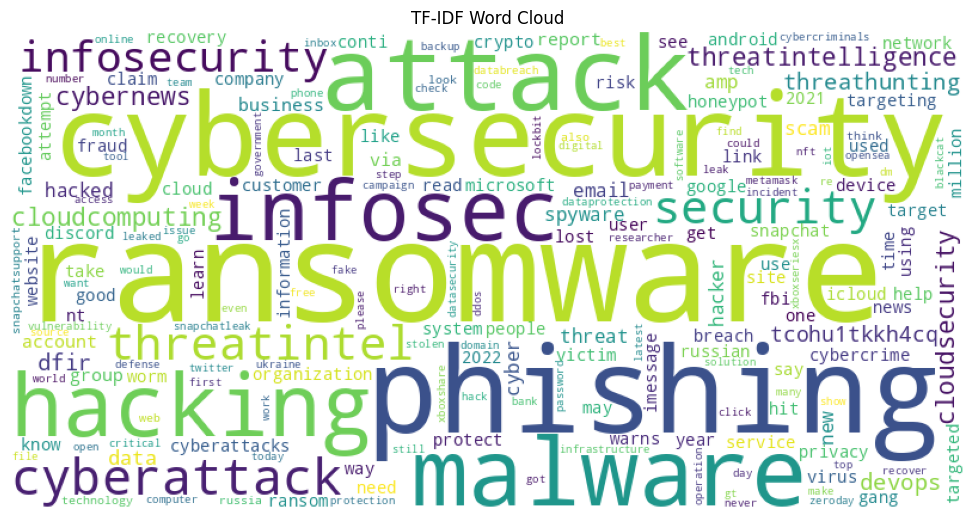

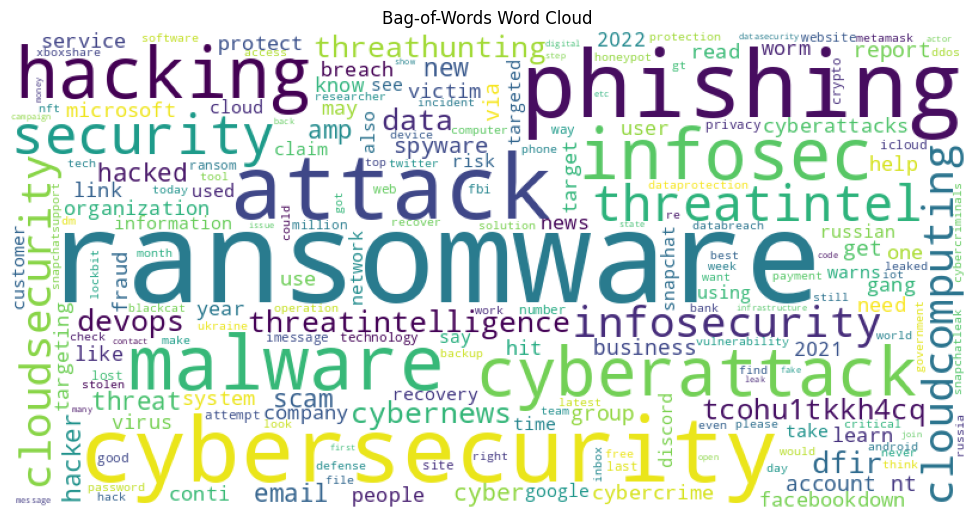

In [ ]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud from TF-IDF scores
def generate_tfidf_wordcloud(tfidf_matrix, feature_names):
  # Sum TF-IDF scores for each word across all documents
  word_tfidf_scores = tfidf_matrix.sum(axis=0)

  # Create a dictionary of word and its TF-IDF score
  word_scores = dict(zip(feature_names, word_tfidf_scores.tolist()[0]))

  # Generate word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

  # Display the word cloud
  plt.figure(figsize=(10, 5), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("TF-IDF Word Cloud")
  plt.tight_layout(pad=0)
  plt.show()

# Function to generate and display word cloud from Bag-of-Words counts
def generate_bow_wordcloud(bow_matrix, feature_names):
  # Sum word counts for each word across all documents
  word_counts = bow_matrix.sum(axis=0)

  # Create a dictionary of word and its count
  word_counts_dict = dict(zip(feature_names, word_counts.tolist()[0]))

  # Generate word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_dict)

  # Display the word cloud
  plt.figure(figsize=(10, 5), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("Bag-of-Words Word Cloud")
  plt.tight_layout(pad=0)
  plt.show()


# Generate and display TF-IDF word cloud
generate_tfidf_wordcloud(tfidf_matrix, feature_names)

# Generate and display Bag-of-Words word cloud
generate_bow_wordcloud(bow_matrix, feature_names)
